In [10]:
import pickle 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from matplotlib.pyplot import cm
import matplotlib as mpl

In [2]:
def rec_grps(rec_path, tracks):
    recs = pickle.load(open(rec_path, "rb"))
    recs['recs'] = recs['recs'].map(lambda x: x[:100])
    recs = recs.explode(column='recs').reset_index(drop=True) #load recs
    recs['tid'] = recs['recs'] #make merge compatible 
    recs_with_grp = pd.merge(recs, tracks[['tid', '80_20_LT', 'appear_pop', 'appear_raw', 'log10_popcat']], on='tid')
    
    LT_counts = pd.get_dummies(recs_with_grp[['pid', 'log10_popcat','80_20_LT']], 
               columns=['log10_popcat','80_20_LT']).groupby(['pid'], as_index=False).mean()
    LT_80_20_col = ['pid'] + [c for c in LT_counts.columns if '80_20' in c] 
    LT_10bin_col = ['pid'] + [c for c in LT_counts.columns if '10' in c] 
    
    avg_pref_80_20 = LT_counts[LT_80_20_col].mean()
    avg_pref_10bin = LT_counts[LT_10bin_col].mean()
    
    return avg_pref_80_20, avg_pref_10bin


def run_grp_plots(data_path, rec_paths): 
    print("Loading Data")
    tracks = pickle.load(open(data_path, "rb"))['df_track']
    grp_info = [] 
    grp_dict = {}
    for name in rec_paths.keys():
        print(f"Loading breakdown for {name}")
        rec_path = rec_paths[name]
        LT_80_20, LT_10bin = rec_grps(rec_path, tracks)
        grp_info.append([name, LT_80_20, LT_10bin])
        grp_dict[name] = [LT_80_20, LT_10bin]
    return grp_info, LT_80_20, LT_10bin, grp_dict 


In [3]:
data_list, LT_80_20, LT_10bin, grp_dict   = run_grp_plots(data_path, rec_paths)

NameError: name 'data_path' is not defined

Loading Data
Loading breakdown for REDRESS
Loading breakdown for PINSAGE
Loading breakdown for XQUAD
Loading breakdown for MOST_POP
Loading breakdown for ZEROSUM
Loading breakdown for BOOST
Loading breakdown for MACR


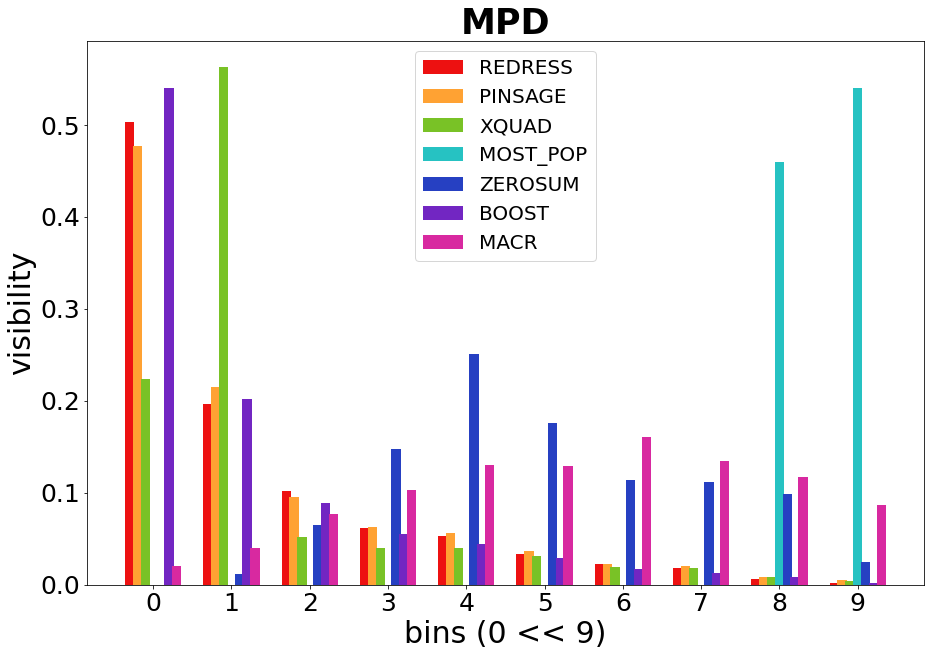

In [11]:
data_path = '/home/mila/r/rebecca.salganik/scratch/MusicSAGE_Data_Final2/MPD_Subset/train_val.pkl'
 
mpl.rcParams['font.size'] = 25

prefix = '/home/mila/r/rebecca.salganik/scratch/PinSAGE_experiments/FULL_RUNS/MPD_Subset/'
suffix = 'test/u_rec_tracks.pkl'


rec_paths = {
    'REDRESS': f'{prefix}REDRESS/v1_G_0.5_A_0.01_B_0.0/redress/{suffix}', 
    'PINSAGE': f'{prefix}REDRESS/v1_G_0.5_A_0.01_B_0.0/utility/{suffix}',
    'XQUAD': f'{prefix}XQUAD/v1_G_0.1/xquad_recs.pkl',
    'MOST_POP': f'{prefix}POP/pop_recs.pkl', 
    'ZEROSUM': f'{prefix}SR2/v1_LightGCN_G_0.1/OG/test/rec_tracks.pkl',
    'BOOST': f'{prefix}BOOST/boost2/v1_G_0.6_A_0.01/redress/u_rec_tracks.pkl',
    'MACR': f'{prefix}MACR/v1_LightGCN_MACR/OG_C_5/rec_tracks_5.pkl'
    
}

# colors = list(cm.rainbow(np.linspace(0, 1, 7)))
colors = list(cm.gist_rainbow(np.linspace(0, 1, 7)))
colors = ['#ed1111', '#FFA233', '#79C226', '#26C2C2', '#2640C2', '#7226C2', '#D829A0']
data_list, LT_80_20, LT_10bin, data_dict  = run_grp_plots(data_path, rec_paths)
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(10)
plt.figure(figsize=(15,10))

plt.bar(x-0.3, data_dict['REDRESS'][1][1:].values, width = 0.12, label='REDRESS', color=colors[0])
plt.bar(x-0.2, data_dict['PINSAGE'][1][1:].values, width = 0.12, label='PINSAGE', color=colors[1])
plt.bar(x-0.1, data_dict["XQUAD"][1][1:].values, width = 0.12, label='XQUAD', color=colors[2])
plt.bar(x, data_dict['MOST_POP'][1][1:].values, width = 0.12, label='MOST_POP', color=colors[3])
plt.bar(x+0.1, data_dict['ZEROSUM'][1][1:].values,  width = 0.12,label='ZEROSUM', color=colors[4])
plt.bar(x+0.2, data_dict['BOOST'][1][1:].values,  width = 0.12,label='BOOST', color=colors[5])
plt.bar(x+0.3, data_dict['MACR'][1][1:].values,  width = 0.12,label='MACR', color=colors[6])



plt.title('MPD', fontsize=35, weight='bold')
plt.xlabel('bins (0 << 9)', fontsize=30)
plt.ylabel('visibility', fontsize=30)
plt.xticks(x, fontsize=25)

plt.legend(fontsize=20)
plt.show()


Loading Data
Loading breakdown for REDRESS
Loading breakdown for PINSAGE
Loading breakdown for XQUAD
Loading breakdown for MOST_POP
Loading breakdown for ZEROSUM
Loading breakdown for BOOST
Loading breakdown for MACR


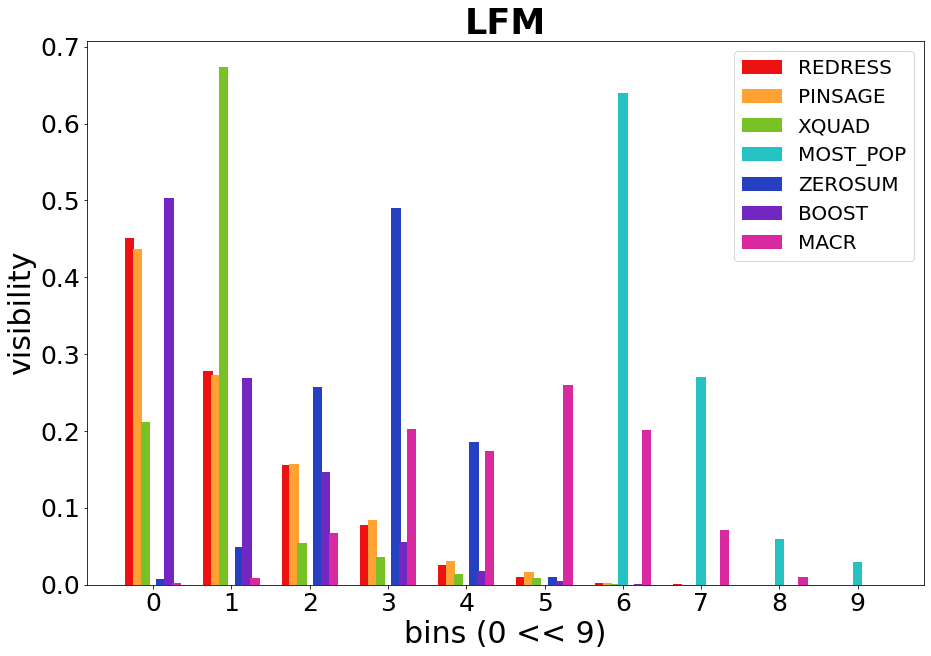

In [12]:
data_path = '/home/mila/r/rebecca.salganik/scratch/MusicSAGE_Data_Final2/LFM_Subset/train_val.pkl'
 

prefix = '/home/mila/r/rebecca.salganik/scratch/PinSAGE_experiments/FULL_RUNS/LFM_Subset/'
suffix = 'test/u_rec_tracks.pkl'


rec_paths = {
    'REDRESS': f'{prefix}REDRESS/v1_G_0.2_A_0.01_B_0.0/redress/{suffix}', 
    'PINSAGE': f'{prefix}REDRESS/v1_G_0.2_A_0.01_B_0.0/utility/{suffix}',
    'XQUAD': f'{prefix}XQUAD/v1_G_0.1/xquad_recs.pkl',
    'MOST_POP': f'{prefix}POP/pop_recs.pkl', 
    'ZEROSUM': f'{prefix}SR2/v1_LightGCN_G_0.5/OG/test/rec_tracks.pkl',
    'BOOST': f'{prefix}BOOST/boost2/v1_G_0.6_A_0.01/redress/u_rec_tracks.pkl', 
    'MACR': f'{prefix}MACR2/v1_LightGCN_MACR/OG/test_5/rec_tracks_5.pkl'
}

# colors = list(cm.rainbow(np.linspace(0, 1, 7)))
# colors = list(cm.gist_rainbow(np.linspace(0, 1, 7)))
colors = ['#ed1111', '#FFA233', '#79C226', '#26C2C2', '#2640C2', '#7226C2', '#D829A0']
data_list, LT_80_20, LT_10bin, data_dict  = run_grp_plots(data_path, rec_paths)
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(10)
plt.figure(figsize=(15,10))


plt.bar(x-0.3, data_dict['REDRESS'][1][1:].values, width = 0.12, label='REDRESS', color=colors[0])
plt.bar(x-0.2, data_dict['PINSAGE'][1][1:].values, width = 0.12, label='PINSAGE', color=colors[1])
plt.bar(x-0.1, data_dict["XQUAD"][1][1:].values, width = 0.12, label='XQUAD', color=colors[2])
plt.bar(x, data_dict['MOST_POP'][1][1:].values, width = 0.12, label='MOST_POP', color=colors[3])
plt.bar(x+0.1, data_dict['ZEROSUM'][1][1:].values, width = 0.12,label='ZEROSUM', color=colors[4])
plt.bar(x+0.2, data_dict['BOOST'][1][1:].values, width = 0.12,label='BOOST', color=colors[5])
plt.bar(x+0.3, data_dict['MACR'][1][1:].values, width = 0.12,label='MACR', color=colors[6])


plt.title('LFM', fontsize=35, weight='bold')
plt.xlabel('bins (0 << 9)', fontsize=30)
plt.ylabel('visibility', fontsize=30)
plt.xticks(x)
plt.legend(fontsize=20)
plt.show()